## The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.<br><br><br>


## Project delivery:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. <br><br><br>

## Data Set:

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

Review the Source Documentation<br>
Understand the field names and data types<br>
Identify relationships across the files<br>
Field/feature transformations<br>
Determine which files should be joined versus which ones should be appended<br>
Create master data and explain the relationship<br>
Identify and remove duplicates<br>
Perform other analysis like NA value and outlier detection<br>
 

Whatever and how many slides you prepare(Be creative and come up with meaningful insight):

The idea is to create a hypothesis, engage with the data, think critically, and use various analytical approaches to produce unique insights.

You are not limited to only utilizing the data you have been provided.

We encourage you to find third party data sets which correspond to the overall theme and geographical properties of the data provided.  For Example: you can leverage US holiday data/ weather data

Also, do research on overall cab industry in US and try to relate that with the trend in data<br><br><br>

## Analysis

Create multiple hypothesis and investigate:

You will need to generate 5-7 hypothesis initially to investigate as some will not prove what you are expecting.

For Example: “Is there any seasonality in number of customers using the cab service?”

Areas to investigate:

Which company has maximum cab users at a particular time period?
Does margin proportionally increase with increase in number of customers?
What are the attributes of these customer segments?
Although not required, we encourage you to document the process and findings

What is the business problem?
What are the properties of the data provided (data intake report)
What steps did you take in order to create an applicable data set?
How did you prepare and perform your analysis?
What type of analysis did you perform?
Why did you choose to use certain analytical techniques over others?
What were the results?

<br><br>

### Importing all required libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import xlrd
import calendar

<br><br>

### Importing datasets

In [6]:
cab_data = pd.read_csv('D:\Study\Data Glacier Internship\Datasets\cab_data.csv')
city = pd.read_csv('D:\Study\Data Glacier Internship\Datasets\city.csv')
customers = pd.read_csv('D:\Study\Data Glacier Internship\Datasets\Customer_ID.csv')
transaction = pd.read_csv('D:\Study\Data Glacier Internship\Datasets\Transaction_ID.csv')
us_holiday = pd.read_csv(r'D:\Study\Data Glacier Internship\Datasets\US_Holiday_Dates.csv', )

<br>

### Analyzing datasets for null values, duplicate values and data types


#### 1. cab_data dataset:

In [7]:
# display cab_data
print(cab_data.info())

# Display top 5 rows of cab_data
print(cab_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 16.5+ MB
None
   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab

>> cab_data has 'Date of Travel' field as integer type which represents MS Excel date-time serial number. It should be converted to date format for further analysis by importing xlrd module and converting serial number to date as below.

In [8]:
# converting date of travel in Datetime format
cab_data['Date of Travel']= [ xlrd.xldate_as_datetime(d,  0) for d in cab_data['Date of Travel']]
print(cab_data['Date of Travel'])

0        2016-01-08
1        2016-01-06
2        2016-01-02
3        2016-01-07
4        2016-01-03
            ...    
359387   2018-01-08
359388   2018-01-04
359389   2018-01-05
359390   2018-01-05
359391   2018-01-02
Name: Date of Travel, Length: 359392, dtype: datetime64[ns]


<br>

#### 2. city dataset:

In [9]:
# Display city information
print(city.info())

# Display top 5 rows of city data
print(city.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 304.0+ bytes
None
             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 


<br>

>> City dataset has population and users count as object data type which should be converted to integer as shown below.

In [10]:
# Converting Population and Users from Object type to Integer type
city['Users']=city['Users'].str.replace(',', '').str.strip().astype(int)
city['Population']=city['Population'].str.replace(',', '').str.strip().astype(int)

city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int32 
 2   Users       20 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 304.0+ bytes


<br>

>> Identifying null values and duplicates

In [11]:
print('Null values:\n',city.isna().sum(),'\n')
print('Duplicated values:\n',city.duplicated().sum())

Null values:
 City          0
Population    0
Users         0
dtype: int64 

Duplicated values:
 0


<br>

#### 3. Customers dataset:


In [12]:
# Display information of customer data
print(customers.info())

# Display top 5 rows
print(customers.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.3+ MB
None
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536


>> Identifying null values and duplicates

In [13]:
print('Null values:\n',customers.isna().sum(),'\n')
print('Duplicated values:\n',customers.duplicated().sum())

Null values:
 Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64 

Duplicated values:
 0


<br>

#### 4. Transaction dataset:


In [14]:
# Display information of transaction data
print(transaction.info())

# Display top 5 rows of transaction data
print(transaction.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 8.4+ MB
None
   Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card


>> Identifying null values and duplicates

In [15]:
print('Null values:\n',transaction.isna().sum(),'\n')
print('Duplicated values:\n',transaction.duplicated().sum())

Null values:
 Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64 

Duplicated values:
 0


<br>

#### 5. US Holiday Dates Dataset


In [36]:
# Display information of us_holiday data
print(us_holiday.info())

# Display top 5 rows of us_holiday data
print(us_holiday.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     342 non-null    object
 1   Holiday  342 non-null    object
 2   WeekDay  342 non-null    object
 3   Month    342 non-null    int64 
 4   Day      342 non-null    int64 
 5   Year     342 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 12.1+ KB
None
         Date      Holiday    WeekDay  Month  Day  Year
0  2004-07-04  4th of July     Sunday      7    4  2004
1  2005-07-04  4th of July     Monday      7    4  2005
2  2006-07-04  4th of July    Tuesday      7    4  2006
3  2007-07-04  4th of July  Wednesday      7    4  2007
4  2008-07-04  4th of July     Friday      7    4  2008


In [43]:
# Converting Date column to datetime format
us_holiday['Date'] = pd.to_datetime(us_holiday['Date'])

# Filtering dates between 2016 to 2018
us_holiday = us_holiday[(us_holiday["Year"]>= 2016) & (us_holiday["Year"]<=2018)]
us_holiday= us_holiday[['Date', 'Holiday']]
us_holiday.head()

,Date,Holiday
12,2016-07-04,4th of July
13,2017-07-04,4th of July
14,2018-07-04,4th of July
30,2016-12-25,Christmas Day
31,2017-12-25,Christmas Day


In [42]:
print('Null values:\n',us_holiday.isna().sum(),'\n')
print('Duplicated values:\n',us_holiday.duplicated().sum())

Null values:
 Date       0
Holiday    0
WeekDay    0
Month      0
Day        0
Year       0
dtype: int64 

Duplicated values:
 0


<br><br>

### Merging datasets for further analysis

In [49]:
merged_data = cab_data.merge(transaction, how='left', on='Transaction ID'). merge(customers, how='left', on='Customer ID')

## Gather Required data for analysis
merged_data = merged_data.sort_values('Date of Travel')
merged_data['Profit'] = merged_data['Price Charged'] - merged_data['Cost of Trip']
merged_data['Year'] = [ x.year for x in merged_data['Date of Travel']]
merged_data['Month'] = [ x.month for x in merged_data['Date of Travel']]
merged_data['Day'] = [ x.day for x in merged_data['Date of Travel']]
merged_data['Profit per KM'] = merged_data['Profit'] / merged_data['KM Travelled']
merged_data['Quarter'] = pd.cut(merged_data['Month'], bins=[1, 3, 6, 9,12], include_lowest=True, labels=['First', 'Second', 'Third', 'Forth'])
merged_data['Weekday'] = [x.strftime('%A') for x in merged_data['Date of Travel']]

        Transaction ID Date of Travel     Company            City  \
1030          10001340     2016-01-02  Yellow Cab   WASHINGTON DC   
489           10000640     2016-01-02  Yellow Cab      CHICAGO IL   
484           10000635     2016-01-02  Yellow Cab      CHICAGO IL   
850           10001001     2016-01-02  Yellow Cab     NEW YORK NY   
160           10000171     2016-01-02    Pink Cab    SAN DIEGO CA   
...                ...            ...         ...             ...   
355489        10435011     2018-12-31  Yellow Cab        MIAMI FL   
354114        10433309     2018-12-31    Pink Cab  LOS ANGELES CA   
356365        10435915     2018-12-31  Yellow Cab   SACRAMENTO CA   
359162        10439845     2018-12-31  Yellow Cab       TUCSON AZ   
358336        10438644     2018-12-31  Yellow Cab     NEW YORK NY   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
1030           10.20         202.54      135.8640        52536         Card   
489          

<br>

#### Defining functions required for the analysis



In [290]:
## Function to add style to visual plots
def style_plot(xlabel="", ylabel="", title=""):
    plt.ylabel(ylabel, size=20)
    plt.xlabel(xlabel, size=20)
    plt.title(title, size=25)
    plt.xticks(size= 15)
    plt.yticks(size = 15)
    plt.legend(prop={'size' : 15})

## Function to annotate valus in barplot
def annotate(plot_var, forma):

    for bar in plot_var.patches:
 
        plot_var.annotate(format(bar.get_height(),forma),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=18, xytext=(0, 8),
                        textcoords='offset points')

## Function to annotate value in Lineplot
def anottate_line(x, y,data, offset):
    for i in range(len(data)):
        plt.text(data[x][i], data[y][i] + offset,data[y][i])

<br><br>

### Explanatory Data Analysis (EDA)

Cab insustry is service-oriented industry which is driven by customers. There are basically some criterias to check for investing in cab industry which are discussed below:
1. Profit analysis: Profit analysis of a firm is the top most criteria if we are looking to invest in a company.
2. Number of rides analysis: Total transacttions also define profits and popularity of the company.
3. Customer analysis: As this industry is customer service driven, we need to focus on customers preferences towards the companies.
4. Geographic location analysis: Geographic location plays an important role for the development of any industry.
5. Holiday Analysis: Customer preferences and profit earned during holidays are compared.

<br>

#### <b>1. Profit Analysis:

##### Annual Profit Analysis

>Visualization of Profit earned per year considering all trips for both companies.

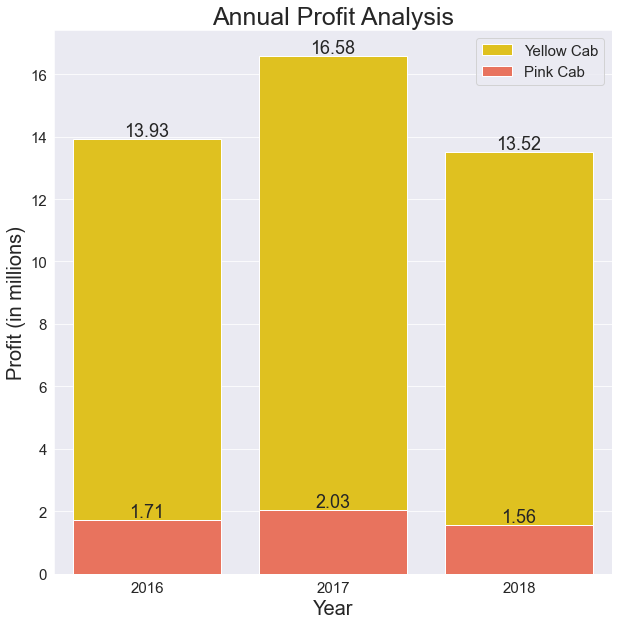

In [92]:
## Yellow cab taxi data
yellow_data = merged_data[merged_data['Company']=='Yellow Cab']
yellow_plot = yellow_data[['Year','Profit']].groupby('Year').agg({'Profit':'sum'})/1000000

## Pink Cab taxi data
pink_data = merged_data[merged_data['Company']=='Pink Cab']
pink_plot = pink_data[['Year','Profit']].groupby('Year').agg({'Profit':'sum'})/1000000


## Data Visualization
plt.figure(figsize=(10,10))
a = sns.barplot(x=yellow_plot.index, y='Profit', data = yellow_plot, color = 'gold', label='Yellow Cab')
b = sns.barplot(x=pink_plot.index, y='Profit', data = pink_plot, color= 'tomato', label='Pink Cab')
style_plot(xlabel='Year', ylabel='Profit (in millions)', title='Annual Profit Analysis')
annotate(a, '0.2f')

<br>

##### Profit per Kilometer of ride

>This visualization indicated profit earned per Kilometer of travel for both the companies.

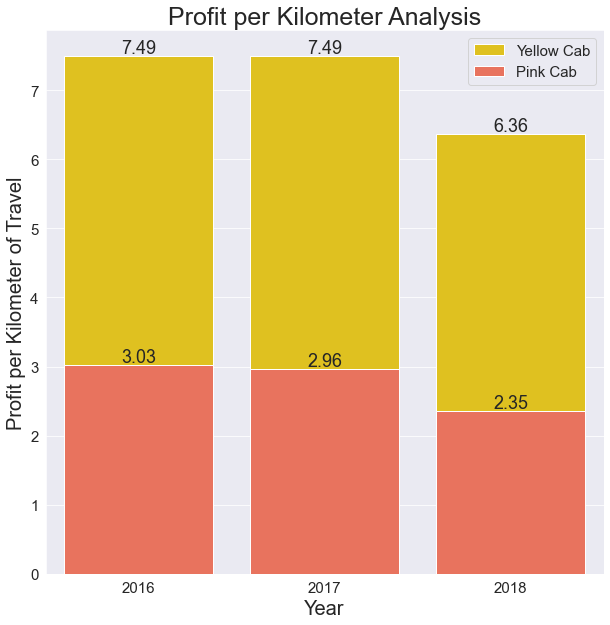

In [91]:
## Preparing datasets
yellow_perKM = yellow_data[['Year','Profit per KM']].groupby('Year').agg({'Profit per KM':'mean'})
pink_perKM = pink_data[['Year','Profit per KM']].groupby('Year').agg({'Profit per KM':'mean'})

## Data Visualization
plt.figure(figsize=(10,10))
c= sns.barplot(x=yellow_plot.index, y='Profit per KM', data = yellow_perKM, color = 'gold', label='Yellow Cab')
d = sns.barplot(x=pink_plot.index, y='Profit per KM', data = pink_perKM, color= 'tomato', label='Pink Cab')
style_plot(xlabel='Year', ylabel='Profit per Kilometer of Travel', title='Profit per Kilometer Analysis')
annotate(c,'.2f')

<br>

##### Profit per Ride Analysis

> Average profit per ride is calculated as per below.

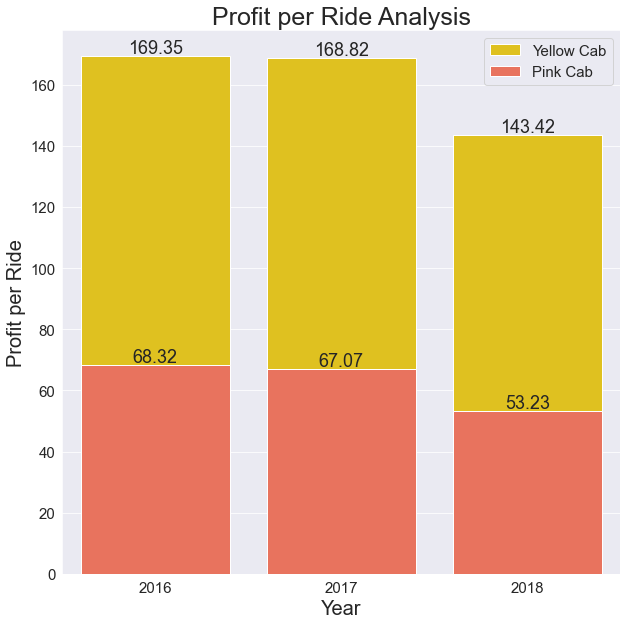

In [90]:
# Preparing Datasets for Analysis
profit_tran_yellow = yellow_data[['Year','Profit']].groupby('Year').agg({'Profit':'mean'}).reset_index()
profit_tran_pink = pink_data[['Year','Profit']].groupby('Year').agg({'Profit':'mean'}).reset_index()

# Data Visualization
plt.figure(figsize=(10,10))
e= sns.barplot(x='Year', y='Profit', data=profit_tran_yellow, color='gold', label='Yellow Cab')
f= sns.barplot(x='Year', y='Profit', data=profit_tran_pink , color='tomato', label='Pink Cab')
style_plot(xlabel='Year', ylabel='Profit per Ride', title='Profit per Ride Analysis')
annotate(e,'.2f')


<br>

##### Quaterly Profit Analysis


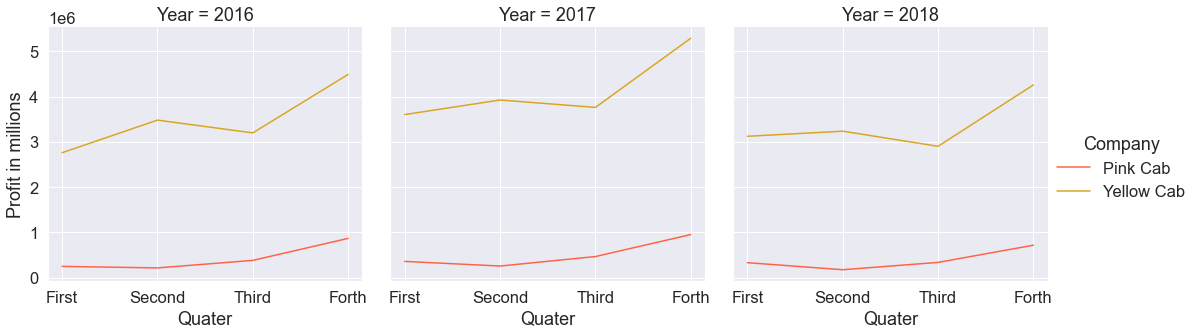

In [126]:
## Dataset preparation for analysis
quar_prof = merged_data.groupby(['Company', 'Year', 'Quarter']).agg({'Profit':'sum'}).reset_index()

## Data Visualization
sns.set(font_scale=1.5)
g = sns.relplot(x='Quarter', y='Profit', data = quar_prof, col='Year',hue='Company', kind='line', 
palette={'Yellow Cab':'goldenrod', 'Pink Cab':'tomato'}).\
set(xlabel='Quater', ylabel = 'Profit in millions')

<br><br>

#### <u><b>2. No. of Rides Analysis

##### Average Monthly Rides Analysis

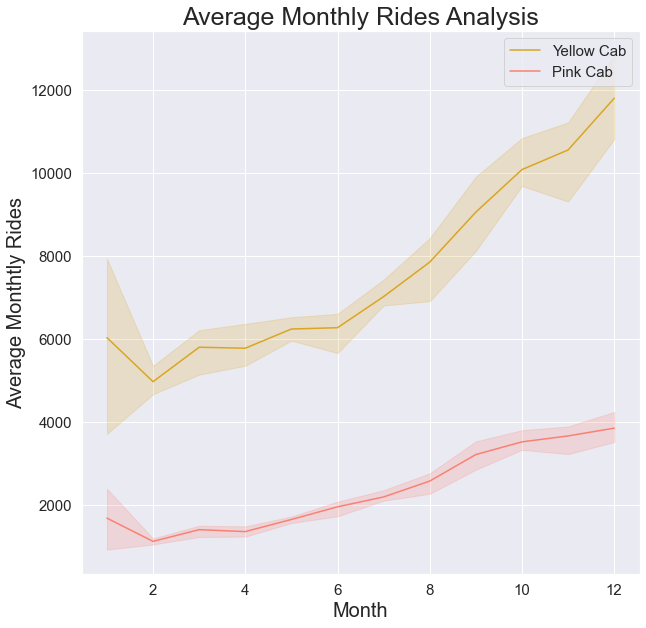

In [138]:
# Data Preparation
monthly_yellow = yellow_data.groupby(['Year','Month']).agg(No_of_Transactions=('Transaction ID','count')).reset_index()
monthly_pink = pink_data.groupby(['Year','Month']).agg(No_of_Transactions=('Transaction ID','count')).reset_index()

# Data Visualization
sns.set_style('darkgrid')
plt.figure(figsize=(10,10))
sns.lineplot(x='Month', y='No_of_Transactions', data=monthly_yellow, color='goldenrod', label='Yellow Cab')
sns.lineplot(x='Month', y='No_of_Transactions', data=monthly_pink, color= 'salmon', label='Pink Cab')
style_plot(xlabel='Month', ylabel='Average Monthtly Rides', title='Average Monthly Rides Analysis')

    Year  Day  No_of_Transactions
0   2016    1                2281
1   2016    2                2581
2   2016    3                2958
3   2016    4                2603
4   2016    5                2497
..   ...  ...                 ...
88  2018   27                3123
89  2018   28                3209
90  2018   29                2893
91  2018   30                2750
92  2018   31                1727

[93 rows x 3 columns]


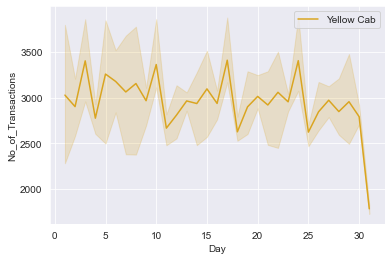

In [24]:
daily_yellow = yellow_data.groupby(['Year','Day']).agg(No_of_Transactions=('Transaction ID','count')).reset_index()
print(daily_yellow)

sns.set_style('darkgrid')
sns.lineplot(x='Day', y='No_of_Transactions', data=daily_yellow, color='goldenrod', label='Yellow Cab')


<br>

##### Daily Rides Analysis

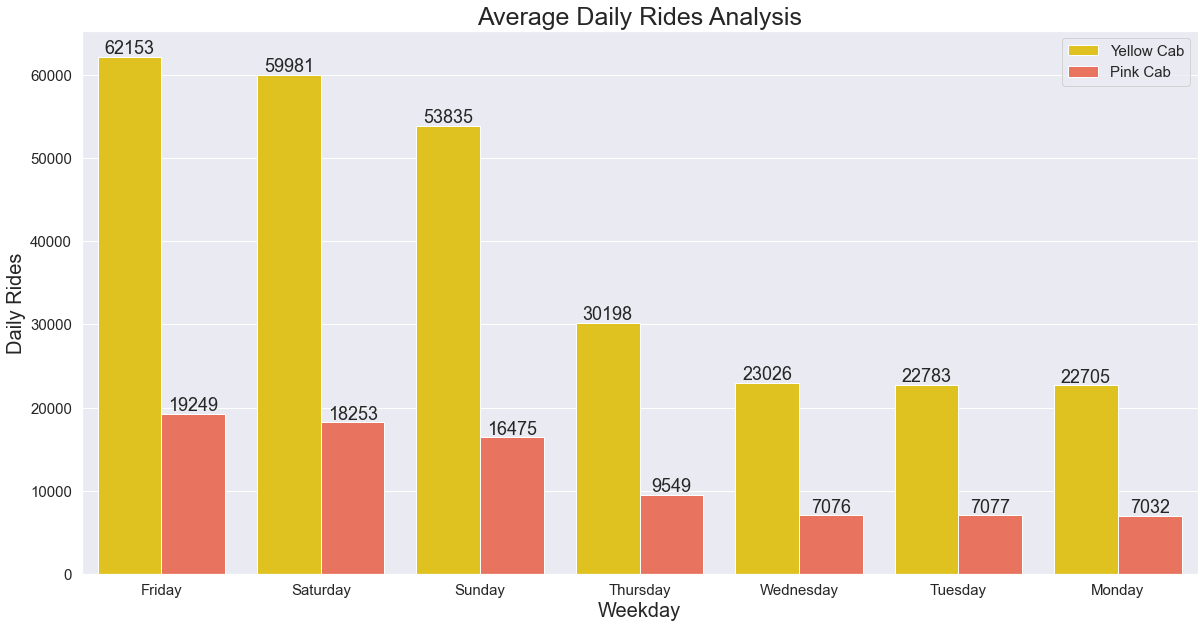

In [223]:
# Data Preparation
day_trans = merged_data.groupby(['Company', 'Weekday']).agg({'Transaction ID':'count'}).\
sort_values('Transaction ID', ascending= False).reset_index()

# Data Visualization
plt.figure(figsize=(20,10))
m = day_trans_plot = sns.barplot(x='Weekday', y='Transaction ID', data=day_trans, hue='Company', 
palette={'Yellow Cab':'gold', 'Pink Cab':'tomato'})
style_plot(xlabel='Weekday', ylabel='Daily Rides', title ='Average Daily Rides Analysis')
annotate(m,'0.0f')

<br>

#### <b>3. Customer Analysis:

##### Customer Distribution

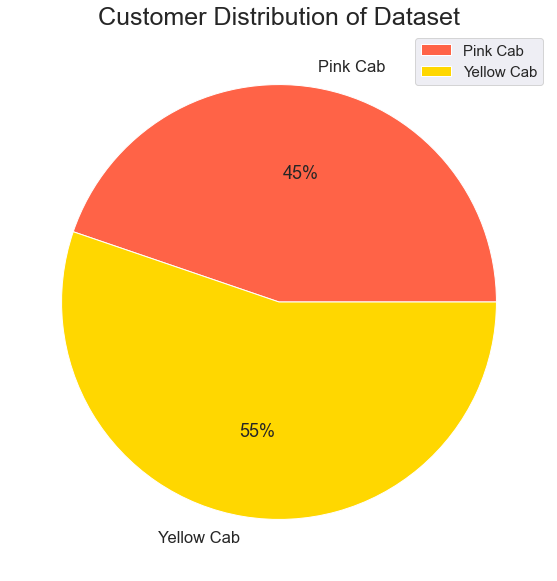

In [270]:
# Data Preparation
cust_data = merged_data[['Customer ID', 'Company']].groupby('Company').agg({'Customer ID':'nunique'}).reset_index()

# Data Visualization
plt.figure(figsize=(10,10))
plt.pie(cust_data['Customer ID'], labels=cust_data['Company'], colors=['tomato', 'gold'], autopct="%.0f%%")
style_plot(title='Customer Distribution of Dataset')

##### Customer Growth Analysis

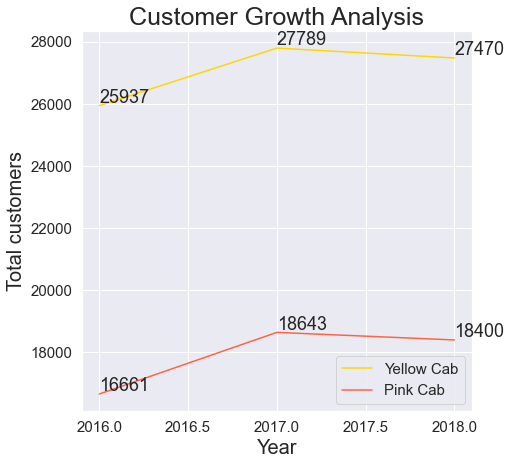

In [293]:
# Data Preparation
cust_gro_yellow = yellow_data.groupby('Year').agg({'Customer ID':'nunique'}).reset_index()
cust_gro_pink = pink_data.groupby('Year').agg({'Customer ID':'nunique'}).reset_index()

# Data Visualization
plt.figure(figsize=(7,7))
sns.lineplot(data=cust_gro_yellow, x='Year', y='Customer ID', color='gold', label='Yellow Cab')
sns.lineplot(data=cust_gro_pink, x='Year', y='Customer ID', color='tomato', label='Pink Cab')
style_plot(xlabel='Year', ylabel='Total customers', title='Customer Growth Analysis')
anottate_line(x='Year', y='Customer ID', data=cust_gro_yellow, offset=100)
anottate_line(x='Year', y='Customer ID', data=cust_gro_pink, offset= 100)

In [280]:
cust_gro_yellow['Year'][1]

2017

Citywise Customer Analysis

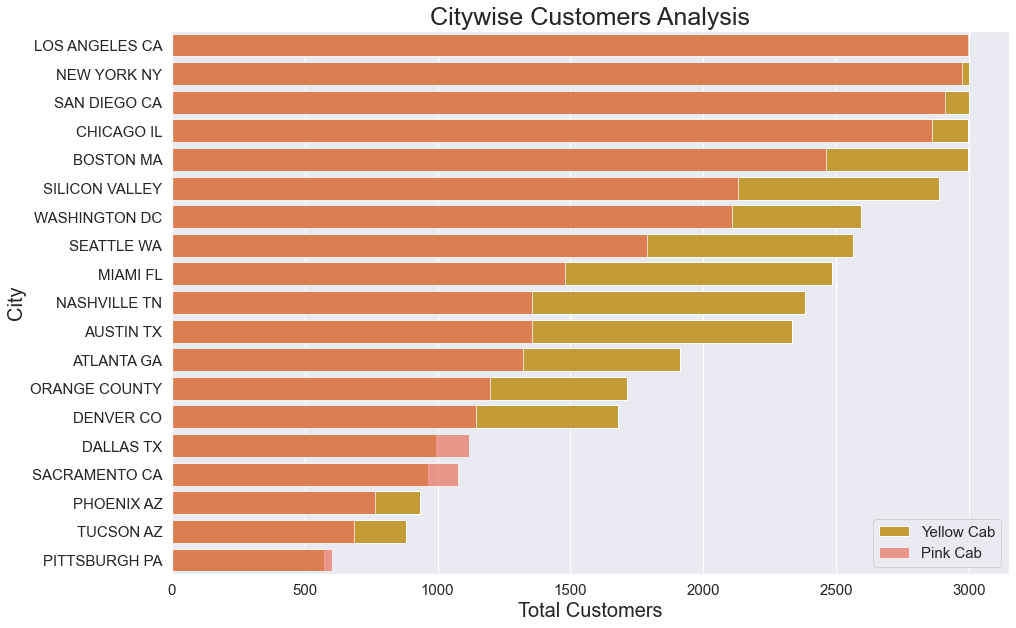

In [173]:
# Data Preparation
cust_city_yellow = yellow_data.groupby('City').\
agg(yellow_cab_customers=('Customer ID','nunique')).sort_values('yellow_cab_customers', ascending=False)
cust_city_pink = pink_data.groupby('City').\
agg(pink_cab_customers= ('Customer ID','nunique')).sort_values('pink_cab_customers', ascending=False)

# Data Visualization
plt.figure(figsize=(15,10))
n =sns.barplot(y=cust_city_yellow.index, x='yellow_cab_customers', orient="h", data=cust_city_yellow, color='goldenrod', label='Yellow Cab')
o =sns.barplot(y=cust_city_pink.index, x='pink_cab_customers', orient="h", data=cust_city_pink, color='tomato', label='Pink Cab', alpha=0.7)
style_plot(xlabel='Total Customers', ylabel='City', title = 'Citywise Customers Analysis')

<br><br>

#### <b>4. Geographic Location Analysis:

##### Total rides per City Analysis

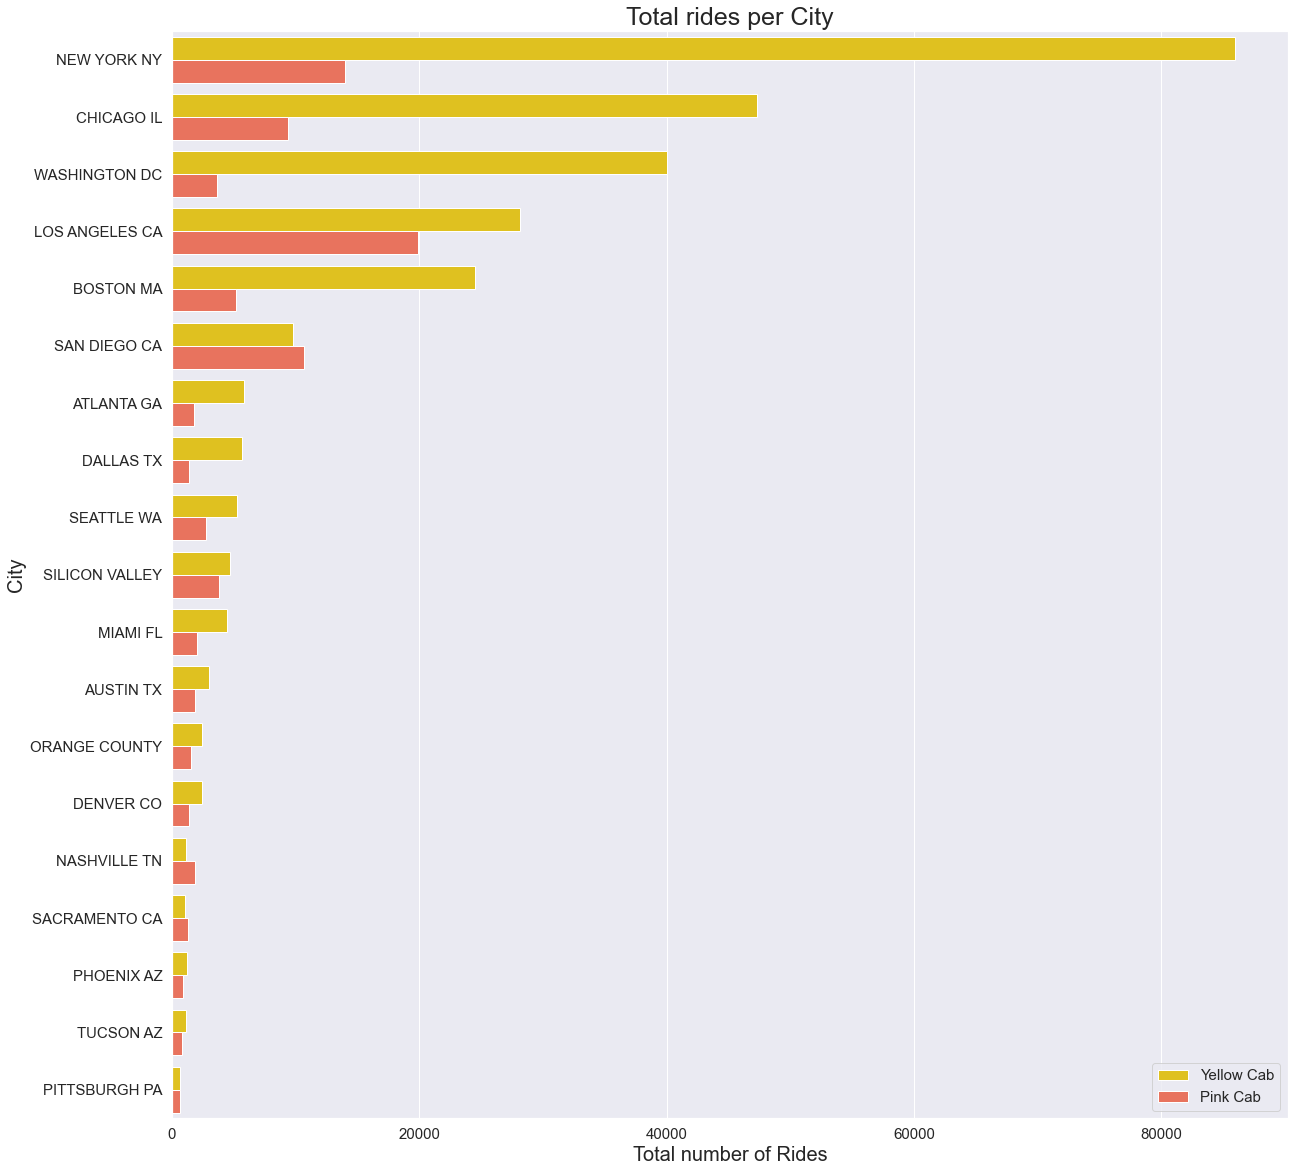

In [ ]:
# Data Preparation
city_com_tran = merged_data[['City','Company','Transaction ID']].groupby(['City','Company']).\
agg(No_of_transactions= ('Transaction ID','count')).sort_values('No_of_transactions', ascending=False).reset_index()

# Data Visualization 
plt.figure(figsize=(20,20))
sns.barplot(y= 'City', x='No_of_transactions' , hue='Company', data=city_com_tran, orient="h", 
palette={'Yellow Cab':'gold', 'Pink Cab': 'tomato'} )
style_plot(xlabel='Total number of Rides', ylabel='City', title='Total rides per City')

<br>

##### Citywise Customer reach Analysis

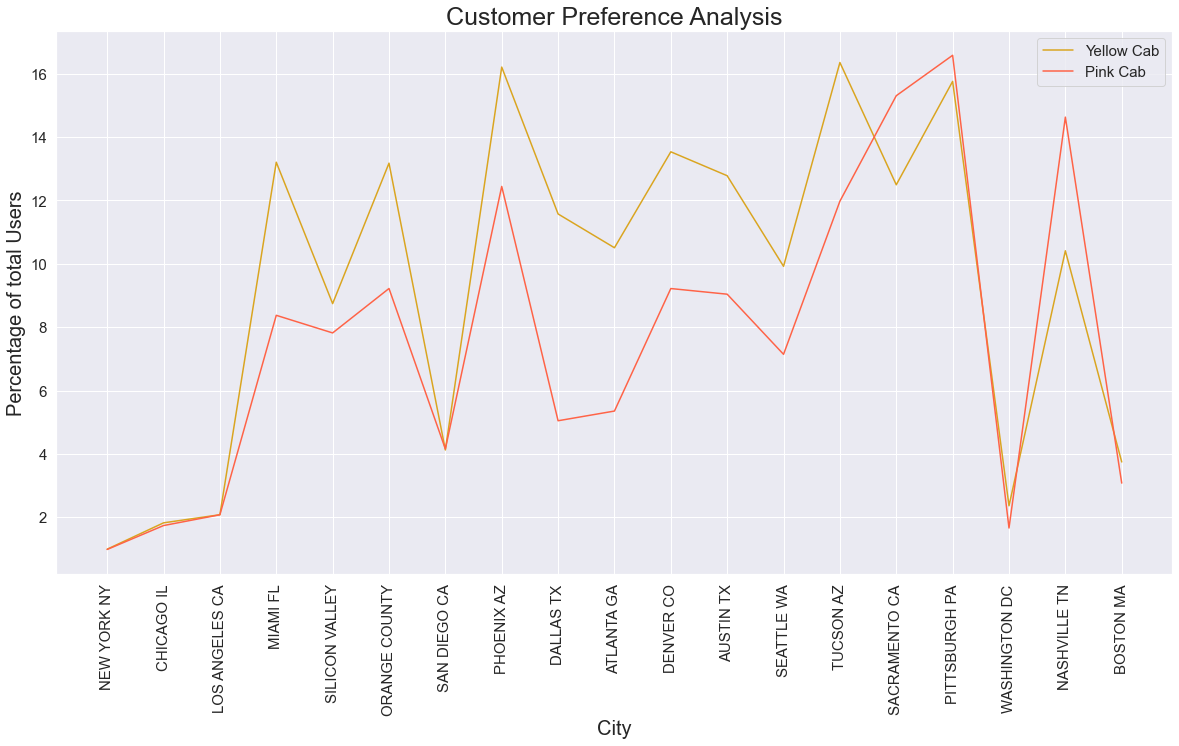

In [188]:
# Data Preparation
city_customers = city[['City','Users']].merge(cust_city_yellow, on='City').merge(cust_city_pink,on='City')
city_customers['Yellow Cab users(%)'] = city_customers['yellow_cab_customers'] * 100/ city_customers['Users']
city_customers['Pink Cab users(%)'] = city_customers['pink_cab_customers'] * 100/ city_customers['Users']

# Data Visualization
plt.figure(figsize=(20,10))
sns.lineplot(y='Yellow Cab users(%)', x='City', data = city_customers, color='goldenrod', label='Yellow Cab')
sns.lineplot(y='Pink Cab users(%)', x='City', data = city_customers, color='tomato', label='Pink Cab')
plt.xticks(rotation=90)
style_plot(xlabel='City', ylabel='Percentage of total Users', title='Customer Preference Analysis')

<br><br>

#### <b>5. Holiday Analysis:

#####  Average Profit on Holidays

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

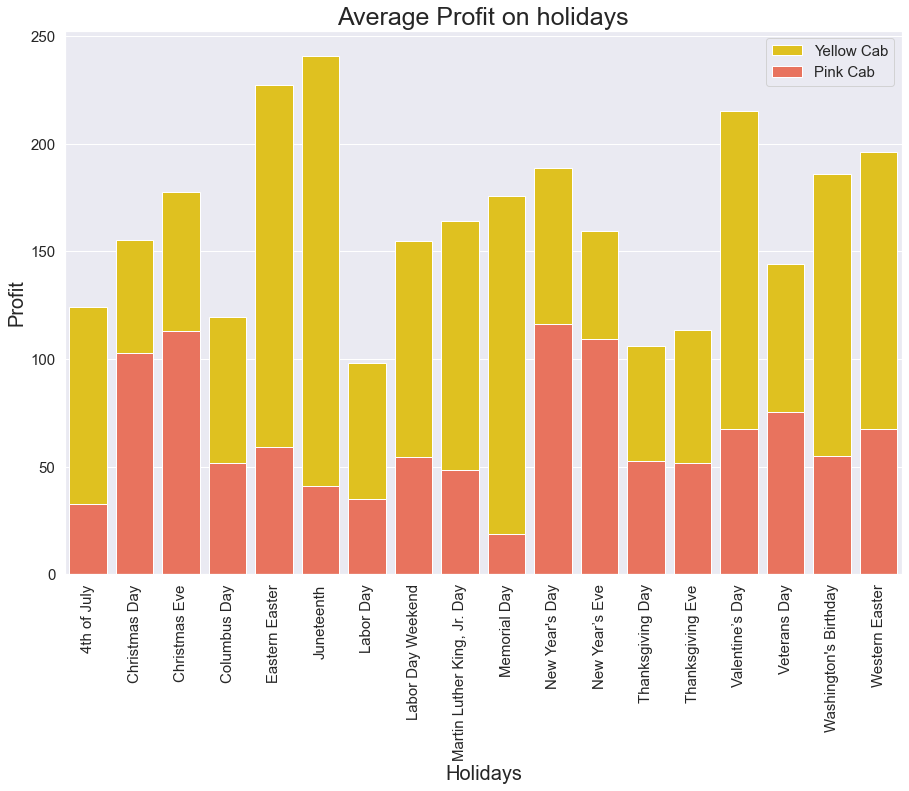

In [220]:
# Data Preparation
holiday_merge = merged_data.merge(us_holiday, left_on='Date of Travel', right_on='Date').sort_values('Date of Travel')
yellow_holiday = holiday_merge[holiday_merge['Company']=='Yellow Cab']
pink_holiday = holiday_merge[holiday_merge['Company']=='Pink Cab']
profit_holiday_yellow = yellow_holiday.groupby('Holiday').agg({'Profit':'mean', 'Transaction ID':'count'}).reset_index()
profit_holiday_pink = pink_holiday.groupby('Holiday').agg({'Profit':'mean', 'Transaction ID':'count'}).reset_index()

# Data Visualization
plt.figure(figsize=(15,10))
sns.barplot(data=profit_holiday_yellow, x='Holiday', y='Profit', color='gold', label='Yellow Cab')
sns.barplot(data=profit_holiday_pink, x='Holiday', y='Profit', color='tomato', label='Pink Cab')
style_plot(xlabel='Holidays', ylabel='Profit', title='Average Profit on holidays')
plt.xticks(rotation = 90)

<br>

##### Customer Preference Holidays

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

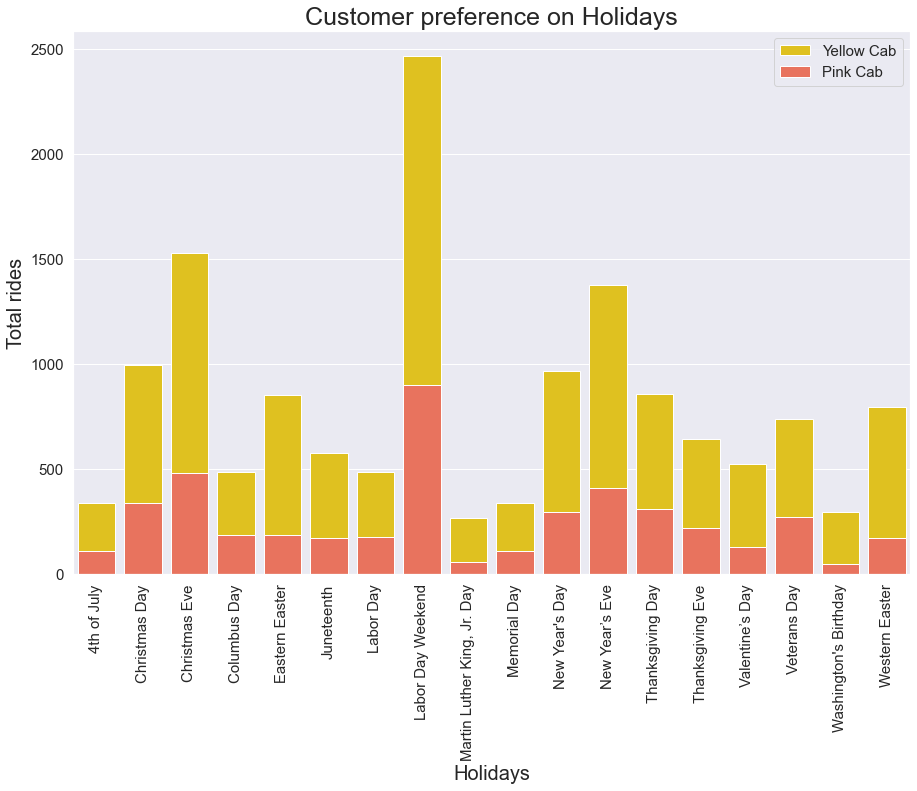

In [222]:
# Data Visualization
plt.figure(figsize=(15,10))
sns.barplot(data=profit_holiday_yellow, x='Holiday', y='Transaction ID', color='gold', label='Yellow Cab')
sns.barplot(data=profit_holiday_pink, x='Holiday', y='Transaction ID', color='tomato', label='Pink Cab')
style_plot(xlabel='Holidays', ylabel='Total rides', title='Customer preference on Holidays')
plt.xticks(rotation = 90)

<br><br>

### EDA Recommendation and Hypothesis results

We have discussed total 5 criterias for analysis as mentioned. Moreovere, the summary of the EDA approach and its key insights are discussed below:


1. Profit Analysis:
In this analysis, we compared annual profit, quarterly profit, per Kilometer profit, per ride profit and result states that Yellow Cab is doing great with 8 times more profit than Pink cab.
Winner: <br>Yellow Cab

2. Number of rides Analysis:
In this analysis, we compared average monthly rides, average daily rides which shows that Yellow Cab is popular more.
<br>Winner: Yellow Cab

3. Customer Analysis:
In this analysis, we compared customer reach and percentage of reach of total cab users and result states that Yellow Cab has more customers than Pink cab.
<br>Winner: Yellow Cab

4. Geographic Location Analysis:
In this analysis, we compared citywise total rides and customer reach. The outcome is that Yellow Cab is doing great with 16 cities out of 19.
<br>Winner: Yellow Cab

5. Holiday Analysis:
In this analysis, we compared profit and rides on holidays for both the companies which comes to a decision that Yellow Cab is more popular than Pink cab on holidays as well.
<br>Winner: Yellow Cab


##### As per the analysis, Investment should be done in <b><u>Yellow Cab company.